In [1]:
from sklearn import datasets
from sklearn import svm
import matplotlib.pyplot as plt
%matplotlib inline

# Data

## Try it out:

- Take a look at some of the images in the dataset
- If new to Python or numpy/scikit: play around with indexing and numpy methods e.g.,
    - array.shape
    - array[2,3]
    - array[:100]
    - array[100:]
    - array[-100:]
    - array[:-100]
    - array.T
    - array.resize(m, n)

[[  0.   0.   5. ...,   0.   0.   0.]
 [  0.   0.   0. ...,  10.   0.   0.]
 [  0.   0.   0. ...,  16.   9.   0.]
 ..., 
 [  0.   0.   1. ...,   6.   0.   0.]
 [  0.   0.   2. ...,  12.   0.   0.]
 [  0.   0.  10. ...,  12.   1.   0.]]


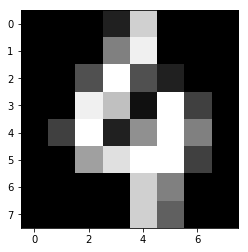

In [3]:
# Load Data
digits = datasets.load_digits()
# Data can be viewed in matrix form...
print(digits.data)
# ...or image form
plt.imshow(digits.images[100], cmap='gray')

In [4]:
print("Data Shape:", digits.data.shape) # shape = (num_rows, num_columns)
print("Number of Examples:", digits.data.shape[0]) # Each row is an example...
print("Number of Features:", digits.data.shape[1]) # Each column is a feature...

Data Shape: (1797, 64)
Number of Examples: 1797
Number of Features: 64


## Labels

### Sanity check:
- Do the number of labels match the number of examples in the data?

In [5]:
# This is a supervised learning task, so the training data has labels
print(digits.target)

[0 1 2 ..., 8 9 8]


In [6]:
print("Number of Labels:", digits.target.shape)

Number of Labels: (1797,)


## Split Data

### Key Points:
- Watch out for information leaks
- Do not train or tune on test data
- Make sure training/test sets are drawn from the same distribution (e.g., by random assignment)
- **Use a validation set!!**

### Methods:
- Cross Validation
    - Holdout
    - Leave-*one*-Out (LOOCV)
    - Leave-*p*-Out (LPOCV)
    - *k*-Fold (KFCV)
    - Repeated Random Subsampling
    
### Questions:
- Is it possible that information from the test set may have leaked into the training set?
- If you let some examples from the test set get into the training set, how does it affect the results in later stages? (Try it out!)
- Are we sure that the training and test sets are drawn from the same distribution?
- How does changing the number of examples in each set affect the results in later stages? (Try it out!)

In [7]:
train_max = 1000
valid_max = 1350
train_X, train_y = digits.data[:train_max], digits.target[:train_max]
valid_X, valid_y = digits.data[train_max:valid_max], digits.target[train_max:valid_max]
test_X, test_y = digits.data[valid_max:], digits.target[valid_max:]

## Train

### Try it out:

Tune `gamma` and `C` used when instantiating the `model` variable:
   1. Fit the model to the training data
   2. Check the score on the validation set
   3. Go back up and change the value of either `gamma` or `C`
   4. Repeat the above steps until you're satisfied (or bored)

### Bonus:
- Look up some other classifiers (other than `svm.SVC`) in the scikit-learn documentation, and try training/tuning them on the same data. Do these perform very well on this dataset? What about after you tune them?

In [7]:
model = svm.SVC(gamma=0.001, C=100.)
model.fit(train_X, train_y)
print("Training Score:", model.score(train_X, train_y))

Training Score: 1.0


## Validation

### Questions:
- How does changing `gamma` and `C` affect the score on the validation set?

In [8]:
print("Validation Score:", model.score(valid_X, valid_y))

Validation Score: 0.982857142857


## Test

### Questions:
- Do very high scores on the validation set always lead to high scores on the test set?
- Should the test or validation scores ever be higher than the score on the training set?
- Why is it a problem to tune `gamma` or `C` based on a model's performace on the test set?

In [9]:
print("Test Score", model.score(test_X, test_y))

Test Score 0.959731543624


## Predict

### Try it out:
See for yourself how it performs on different images!

Prediction: 1


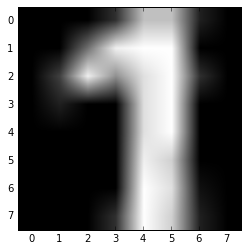

In [10]:
plt.imshow(digits.images[1500], cmap='gray')
print("Prediction:", model.predict(digits.data[1500].reshape((1,-1)))[0])